# Error analysis
Let's carry out the error analysis on the dev set. The results can be discussed with the matrices produced in ML_element_08.ipynb.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

In [2]:
from split import *
data_df = pd.read_csv('data/XRF_ML_cr.csv')
X = data_df.iloc[:, 1:-2].values
y = data_df['facies_merge_2'].values
groups = data_df['core_section'].values

train_idx, test_idx = my_train_test_split(y, groups)
trainn_idx, dev_idx = my_group_stratify_shuffle(X[train_idx],y[train_idx], groups[train_idx])

In [3]:
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0)
info_dev = info_df.loc[data_df.composite_id[train_idx[dev_idx]], :].copy()
info_dev

,tidezone,composite_spe_dir,composite_depth_mm,original_depth_mm,core_id,data_original_dir,long_utm,core_section,lat_utm,depth_to_water_surface_mm,section_depth_mm,coring_date
composite_id,,,,,,,,,,,,
N11_01652,subtidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,1652,31.0,N11,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,372919.501165,N11-2,5.953943e+06,1656.0,27.0,2017-09-26
N11_01654,subtidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,1654,33.0,N11,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,372919.501165,N11-2,5.953943e+06,1658.0,29.0,2017-09-26
N11_01656,subtidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,1656,35.0,N11,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,372919.501165,N11-2,5.953943e+06,1660.0,31.0,2017-09-26
N11_01658,subtidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,1658,37.0,N11,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,372919.501165,N11-2,5.953943e+06,1662.0,33.0,2017-09-26
N11_01660,subtidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,1660,39.0,N11,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,372919.501165,N11-2,5.953943e+06,1664.0,35.0,2017-09-26
...,...,...,...,...,...,...,...,...,...,...,...,...
W3_03105,intertidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,3105,949.0,W3,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,380478.526752,W3-1,5.947082e+06,3309.0,3105.0,2016-07-13
W3_03107,intertidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,3107,951.0,W3,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,380478.526752,W3-1,5.947082e+06,3311.0,3107.0,2016-07-13
W3_03109,intertidal,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,3109,953.0,W3,\\10.110.16.10\GeopolarLabor\#Projekte\WASA\XR...,380478.526752,W3-1,5.947082e+06,3313.0,3109.0,2016-07-13


In [4]:
data_dev = data_df.iloc[train_idx[dev_idx], :].copy()
data_dev

,composite_id,Ba_mean,Br_mean,Ca_mean,Cl_mean,Fe_mean,K_mean,Rb_mean,S_mean,Si_mean,...,Fe_std,K_std,Rb_std,S_std,Si_std,Sr_std,Ti_std,Zr_std,facies_merge_2,core_section
2579,N11_01652,-1.140932,-4.640934,2.936142,1.638218,1.151460,1.506723,-1.488079,-1.638320,2.224015,...,0.186261,0.331063,0.373295,0.295694,0.709852,0.650746,0.460446,0.473329,0,N11-2
2580,N11_01654,-1.141064,-4.875439,3.006948,1.660173,1.160519,1.587171,-1.481423,-1.691814,2.184605,...,0.186149,0.247235,0.384438,0.291251,0.706776,0.627252,0.435821,0.475590,0,N11-2
2581,N11_01656,-1.159893,-4.913325,3.143499,1.681150,1.162590,1.629424,-1.506556,-1.714267,2.072101,...,0.189275,0.244872,0.355975,0.310176,0.583410,0.632323,0.431314,0.446274,0,N11-2
2582,N11_01658,-1.239008,-4.763510,3.169231,1.666896,1.144011,1.608881,-1.521047,-1.731262,1.918057,...,0.178859,0.237880,0.362287,0.290446,0.219940,0.501317,0.424041,0.406015,0,N11-2
2583,N11_01660,-1.263535,-4.595770,3.131081,1.652155,1.132020,1.611234,-1.518087,-1.742266,1.887975,...,0.178570,0.238181,0.363656,0.283881,0.223513,0.502541,0.408937,0.463234,0,N11-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150439,W3_03105,-0.456169,-5.430703,1.425268,-0.979300,1.591724,2.625635,-0.548006,-3.101596,3.264783,...,0.138937,0.130669,0.271722,1.177873,0.102657,0.240548,0.214657,0.255647,8,W3-1
150440,W3_03107,-0.477191,-5.437239,1.407212,-0.973380,1.575659,2.609718,-0.555895,-2.938111,3.260546,...,0.120837,0.108850,0.275565,1.005436,0.100556,0.220242,0.212850,0.268884,8,W3-1
150441,W3_03109,-0.452871,-5.580904,1.404554,-0.959958,1.576245,2.618492,-0.540859,-2.864132,3.272320,...,0.120412,0.100509,0.260577,0.998901,0.085149,0.215194,0.217383,0.261273,8,W3-1
150442,W3_03111,-0.444992,-5.570872,1.404071,-0.953566,1.577968,2.626123,-0.536220,-2.918725,3.282784,...,0.122281,0.100899,0.257613,1.001704,0.087373,0.205369,0.211281,0.260994,8,W3-1


In [5]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

In [6]:
count_list = []
for facies in range(12):
    count_list.append(
        len(data_dev.loc[data_dev.facies_merge_2 == facies, 'core_section'].unique())
    )

count_df = pd.DataFrame({'facies': Facies, 'section amount': count_list})
count_df

,facies,section amount
0,Shoreface,5
1,Channel,17
2,Beach-foreshore,2
3,Sand flat,10
4,Mud flat,2
5,Lagoon,3
6,Peat,6
7,Soil,4
8,Eolian/fluvial (w),7
9,Shallow marine,8


# Output labels
We consider the core sections belonging to the facies exluding Morain and E/F need to have error analysis because these facies have more than 15% of error based on the confusion matrix. First, we pick two sections, having most error, in each facies since some facies only have 2 sections. Later if we find it necessary, we can increase the amount of section in some facies. We print out the facies labels along the composite depth in order to compare with elemental profiles (using Tableau), core image and description (using EasyCore).

In [7]:
from joblib import load
svc = load('models/roll_svc_trainn_model_20210511.joblib')

In [8]:
y_dev_pred = svc.predict(data_dev.iloc[:, 1:-2])

In [9]:
len(info_dev.composite_depth_mm)

21608

In [10]:
y_df = pd.DataFrame(
    dict(composite_depth_mm=info_dev.composite_depth_mm.values, 
         core_section=data_dev.core_section.values, 
         y=data_dev.facies_merge_2.values, 
         y_svc=y_dev_pred)
)

y_df['error'] = ~(y_df.y == y_df.y_svc)
y_df

,composite_depth_mm,core_section,y,y_svc,error
0,1652,N11-2,0,1,True
1,1654,N11-2,0,1,True
2,1656,N11-2,0,1,True
3,1658,N11-2,0,1,True
4,1660,N11-2,0,1,True
...,...,...,...,...,...
21603,3105,W3-1,8,6,True
21604,3107,W3-1,8,7,True
21605,3109,W3-1,8,7,True
21606,3111,W3-1,8,7,True


In [18]:
section_list = []
# no need for Morain and E/F, which are the last two facies
for facies in range(10):
#facies = 0
    X = y_df.loc[y_df.y == facies, ['core_section', 'error']]
    # choose the two sections having most errors in each facies
    section_list = np.hstack((section_list, X.groupby('core_section').sum().sort_values('error', ascending=False).index[:2].values))
    
section_list    

array(['N85-4', 'N11-4', 'N96-2', 'N12-3', 'VVC19-4', 'VVC30-1', 'N26-4',
       'W2-3', 'N54-4', 'N57-5', 'VVC09-4', 'N43-1', 'W3-1', 'N71-4',
       'W3-1', 'VVC14-4', 'N79-1', 'N71-3', 'N14-3', 'N77-2'],
      dtype=object)

In [12]:
u, c = np.unique(section_list, return_counts=True)
u[c > 1]

array(['W3-1'], dtype=object)

In [13]:
# replace another section to W3-1 in peat
X = y_df.loc[y_df.y == 6, ['core_section', 'error']]
X.groupby('core_section').sum().sort_values('error', ascending=False).index[:4]

Index(['W3-1', 'N71-4', 'VVC15-3', 'VVC14-4'], dtype='object', name='core_section')

In [21]:
'VVC15-3' in section_list

False

In [22]:
section_list[12] = 'VVC15-3'
section_list

array(['N85-4', 'N11-4', 'N96-2', 'N12-3', 'VVC19-4', 'VVC30-1', 'N26-4',
       'W2-3', 'N54-4', 'N57-5', 'VVC09-4', 'N43-1', 'VVC15-3', 'N71-4',
       'W3-1', 'VVC14-4', 'N79-1', 'N71-3', 'N14-3', 'N77-2'],
      dtype=object)

In [23]:
u, c = np.unique(section_list, return_counts=True)
u[c > 1]

array([], dtype=object)

In [15]:
def plot_facies(data_df, section_list, y_pred, Facies):
    """
    data_df is the dataframe having info and labels.
    section_list can be a list of the core sections you want to plot.
    y_preds can be a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    """
    fig, axes = plt.subplots(2, 5, figsize = (11.7, 8.3), sharex='col') # A4 format
    for core_section, ax in zip(section_list, axes.ravel()):
        X = data_df[data_df.core_section == core_section]        
        ax.scatter(X.y - .2, X.composite_depth_mm*.001, marker = 's', s = 1, lw = .5, label = 'description')
        ax.scatter(X[y_pred] + .15, X.composite_depth_mm*.001, marker = 's', s = 1, lw = .5, label = y_pred)
        ax.set_ylim(ax.get_ylim()[::-1])
        ax.set_xlim(-.5, 9.5)
        ax.set_xticks(range(10))
        ax.set_xticklabels(Facies[:-2], rotation = 90)
        ax.set_title(core_section)
        
        
    axes[0, 0].legend(markerscale=3)
    axes[0, 0].set_ylabel('Composite depth (m)')
    axes[1, 0].set_ylabel('Composite depth (m)')
    plt.subplots_adjust(hspace=.12)
    return fig

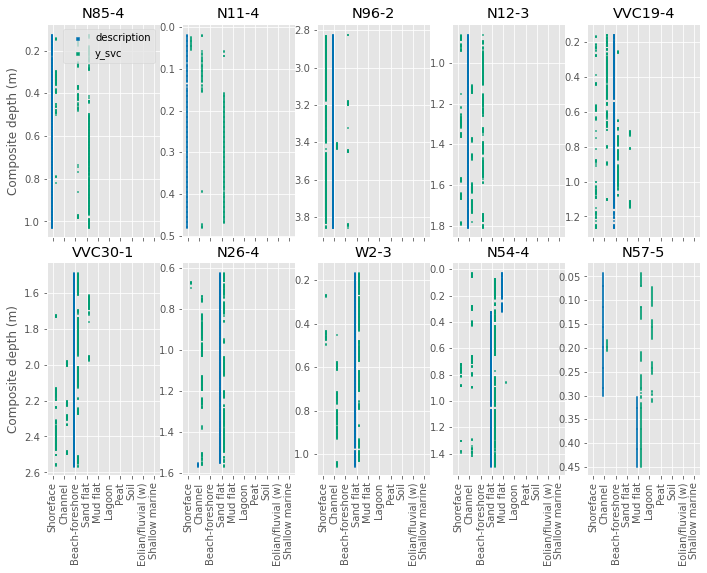

In [16]:
plot_facies(y_df, section_list[:10], 'y_svc', Facies).savefig('results/error_analysis_1_{}.png'.format(date))

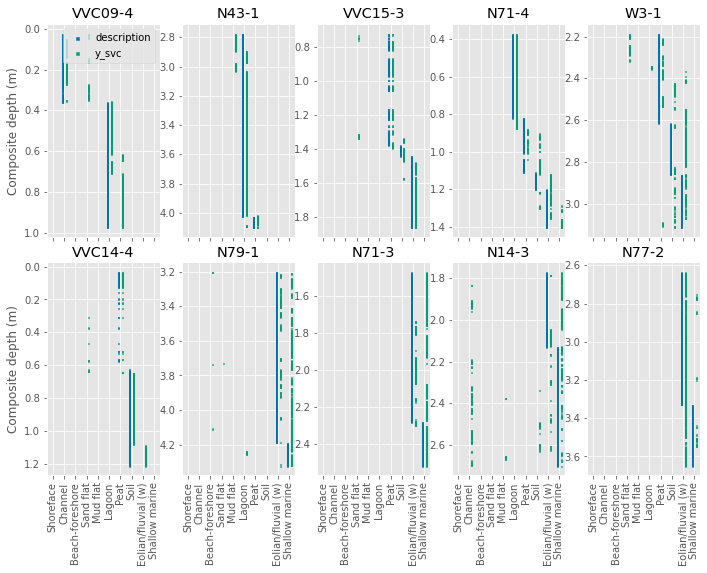

In [24]:
plot_facies(y_df, section_list[10:], 'y_svc', Facies).savefig('results/error_analysis_2_{}.png'.format(date))